# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.

def find_wb(X_train, y_train):
  # (X^T * X)^(-1) * X^T * Y
  X_Train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
  X_train_T = np.transpose(X_Train)
  ans = np.linalg.inv(X_train_T @ X_Train) @ X_train_T @ y_train
  return ans[:1], ans[-1]

def mse(true, pred):    
    return np.mean((true - pred)**2)

def mae(true, pred):    
    return np.mean(np.abs(true - pred))

w, b = find_wb(X_train, y_train)
print('w =', w)
print('b =', b)


### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
y_predicted = X_train @ w + b

mean_absolute_error = mse(y_train, y_predicted)
mean_squared_error = mae(y_train, y_predicted)

print('MSE =', mean_absolute_error)
print('MAE =', mean_squared_error)

w = [10.29060483]
b = -7.703695374998275
MSE = 86.7394386898791
MAE = 7.508627816867438


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
y_train_predicted = model.predict(X_train)

w_ = model.coef_
b_ = model.intercept_
mse_ = mean_squared_error(y_train, y_train_predicted)
mae_ = mean_absolute_error(y_train, y_train_predicted)
print('w =', w_)
print('b =', b_)
print('MSE =', mse_)
print('MAE =', mae_)

w = [10.29060483]
b = -7.7036953749982775
MSE = 86.73943868987908
MAE = 7.508627816867438


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.

# print(data['x_train'])
x2 = data['x_train'].reshape(-1, 1)
# print(x2)
y2 = data['y_train'].reshape(-1, 1)
w2, b2 = find_wb(x2, y2)

print('w =', w2[0])
print('b =', b2[0])

### Найдите значения метрик MSE и MAE
y2_predicted = x2 @ w2 + b2

mean_absolute_error_2 = mse(y2, y2_predicted)
mean_squared_error_2 = mae(y2, y2_predicted)

print('MSE =', mean_absolute_error_2)
print('MAE =', mean_squared_error_2)

# sklearn
print("\nСверка с sklearn:")
model = LinearRegression()
model.fit(data['x_train'].reshape(-1, 1), data['y_train'])
w_2 = model.coef_
b_2 = model.intercept_
print('w =', w_2)
print('b =', b_2)
y_train_predicted_2 = model.predict(data['x_train'].reshape(-1, 1))
print('Train MSE: ', mean_squared_error(data['y_train'], y_train_predicted_2))
print('Train MAE: ',  mean_absolute_error(data['y_train'], y_train_predicted_2))

w = [-0.32705183]
b = 2.034187215119118
MSE = 0.28497730674186345
MAE = 0.442323038253895

Сверка с sklearn:
w = [-0.32705183]
b = 2.0341872151191187
Train MSE:  0.28497730674186345
Train MAE:  0.442323038253895


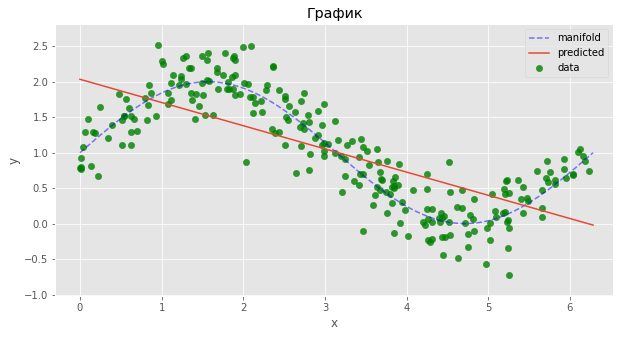

In [ ]:
# график
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.xlabel('x')
plt.ylabel('y')
plt.title("График")
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w_2) + b_2, label='predicted')
plt.legend(loc='upper right')
plt.show()

Видно, что модель недообучена и надо применить полиномиальную регрессию
_______________________________________________________________________

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

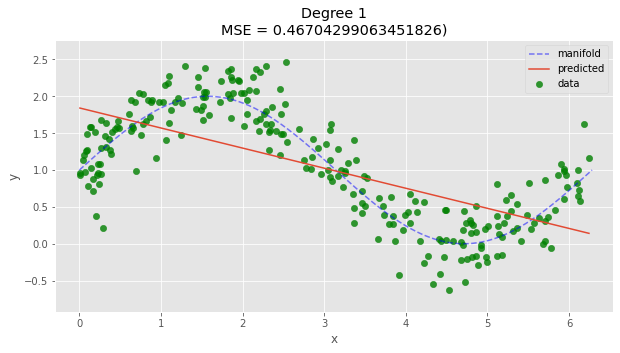

(0.46704299063451826, 1)


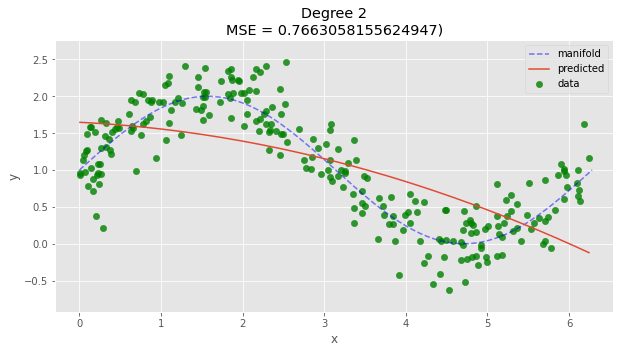

(0.7663058155624947, 2)


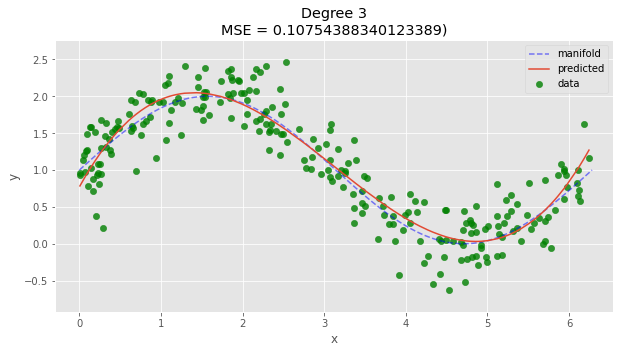

(0.10754388340123389, 3)


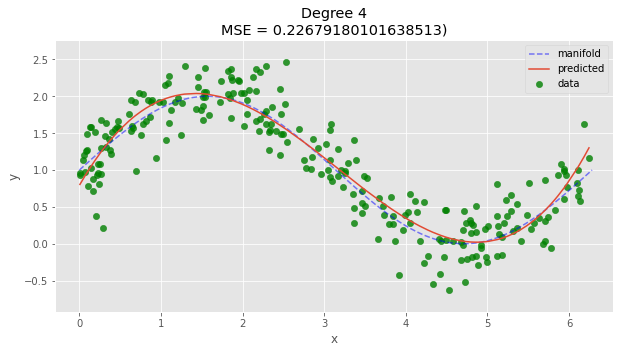

(0.22679180101638513, 4)


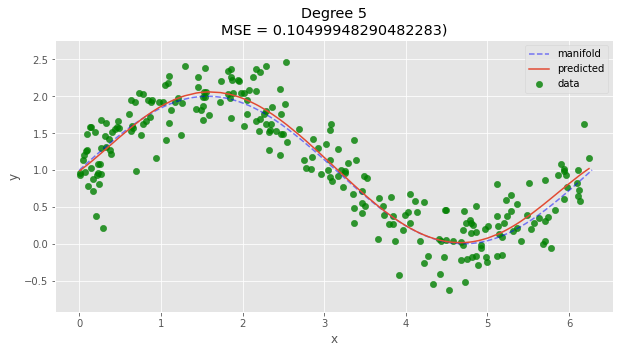

(0.10499948290482283, 5)


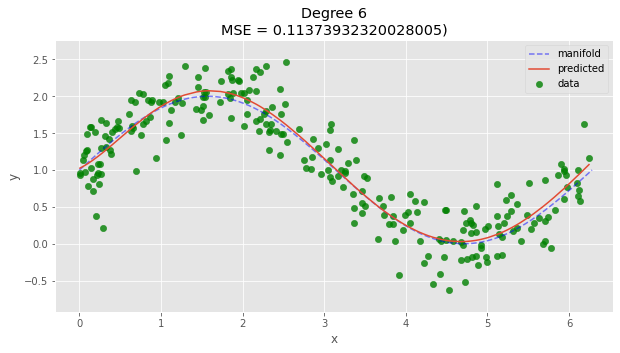

(0.11373932320028005, 6)


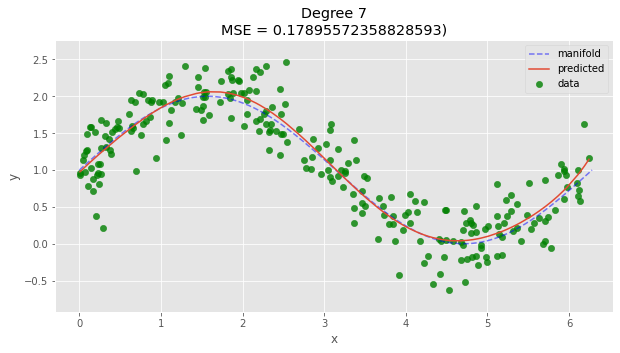

(0.17895572358828593, 7)


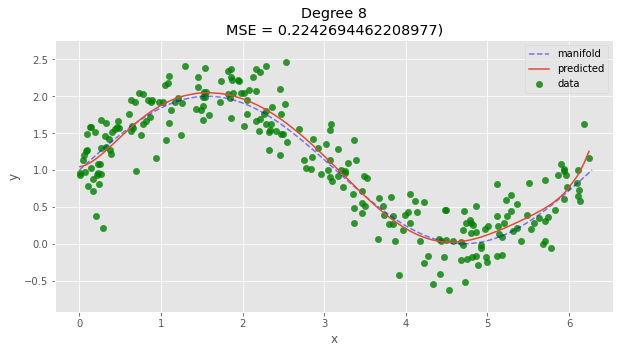

(0.2242694462208977, 8)


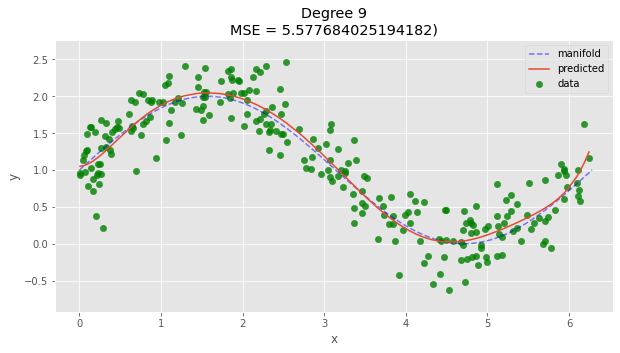

(5.577684025194182, 9)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def draw(degree):
  plt.figure(figsize=(10, 5))
  margin = 0.3
  plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
  plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
  plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
  plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
  plt.xlabel('x')
  plt.ylabel('y')
  polynomial_regression = Pipeline([('polynomial_features', PolynomialFeatures(degree=degree)),('linear_regression', LinearRegression())])
  polynomial_regression.fit(data['x_train'].reshape(-1, 1), data['y_train'])
  scores = cross_val_score(polynomial_regression, data['x_train'].reshape(-1, 1), data['y_train'], scoring="neg_mean_squared_error", cv=10)
  plt.title("Degree {}\nMSE = {})".format(degree, -scores.mean()))
  plt.plot(data['x_train'], polynomial_regression.predict(data['x_train'].reshape(-1, 1)), label='predicted')
  plt.legend(loc='upper right')

  plt.show()
  return -scores.mean(), degree

for degree in range(1, 10):
  print(draw(degree))


Полином со степенью 5 подходит больше всего, так как у него самое маленькое отклонение MSE, то есть модель имеет наилучшее покрытие в отличии от остальных

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

## Задание 3.4

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# разобьем выборку на train и test в соотношении 70/30.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Train MSE:  21.709927127752252 Test MSE:  23.153644005316277
Train MAE:  3.279277129110861 Test MAE:  3.358469285843973


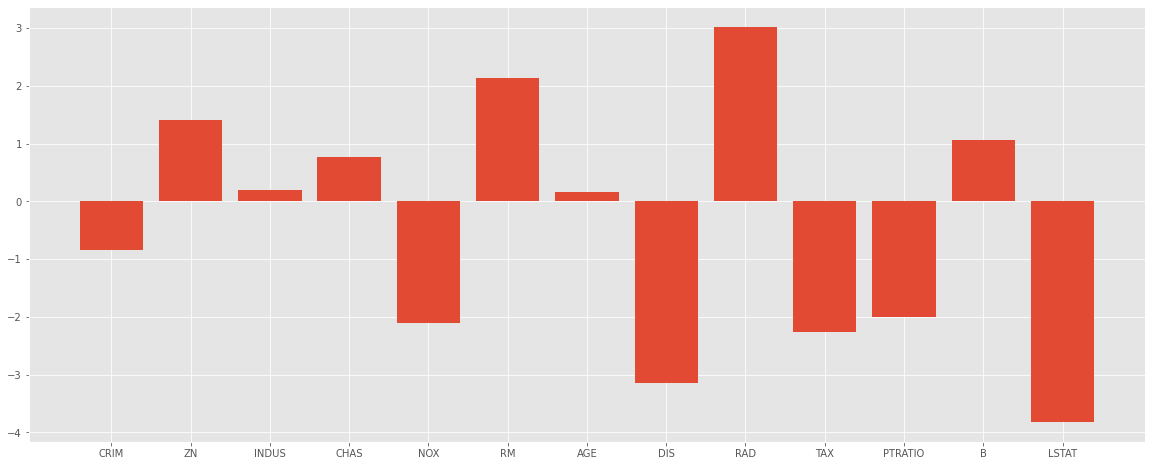

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

Train_MSE = mean_squared_error(y_train, y_train_prediction)
Test_MSE = mean_squared_error(y_test, y_test_prediction)
Train_MAE = mean_absolute_error(y_train, y_train_prediction)
Test_MAE =  mean_absolute_error(y_test, y_test_prediction)
print('Train MSE: ', Train_MSE, 'Test MSE: ', Test_MSE)
print('Train MAE: ', Train_MAE, 'Test MAE: ', Test_MAE)

plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)
plt.show()


In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков

top_seven = pd.DataFrame(index = X.columns)
top_seven["coeff"] = abs(model.coef_)
top_seven = top_seven.sort_values(by='coeff', ascending=False).head(7)
# print(top_seven)

In [ ]:
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

X_train_top = pd.DataFrame(columns = X.columns, data = X_train)[top_seven.index]
X_test_top = pd.DataFrame(columns = X.columns, data = X_test)[top_seven.index]

scaler = StandardScaler()
X_train_top = scaler.fit_transform(X_train_top)
X_test_top = scaler.transform(X_test_top)

new_model = LinearRegression()
new_model.fit(X_train_top, y_train)
y_train_prediction_top = new_model.predict(X_train_top)
y_test_prediction_top = new_model.predict(X_test_top)

Train_MSE_top = mean_squared_error(y_train, y_train_prediction_top)
Test_MSE_top = mean_squared_error(y_test, y_test_prediction_top)
Train_MAE_top = mean_absolute_error(y_train, y_train_prediction_top)
Test_MAE_top =  mean_absolute_error(y_test, y_test_prediction_top)

print('Train MSE: ', Train_MSE_top, 'Test MSE: ', Test_MSE_top)
print('Train MAE: ', Train_MAE_top, 'Test MAE: ', Test_MAE_top)

Train MSE:  24.666293756611804 Test MSE:  23.0223006187716
Train MAE:  3.588470004002731 Test MAE:  3.2910733740644527


In [ ]:
print("full dataset MSE & MAE:")
print('Train MSE: ', Train_MSE, 'Test MSE: ', Test_MSE)
print('Train MAE: ', Train_MAE, 'Test MAE: ', Test_MAE)
print("\ntop 7 MSE & MAE:")
print('Train MSE: ', Train_MSE_top, 'Test MSE: ', Test_MSE_top)
print('Train MAE: ', Train_MAE_top, 'Test MAE: ', Test_MAE_top)

full dataset MSE & MAE:
Train MSE:  21.709927127752252 Test MSE:  23.153644005316277
Train MAE:  3.279277129110861 Test MAE:  3.358469285843973

top 7 MSE & MAE:
Train MSE:  24.666293756611804 Test MSE:  23.0223006187716
Train MAE:  3.588470004002731 Test MAE:  3.2910733740644527


При построении модели линейной регрессии только для 7ми признаков немного теряется точность